Kütüphanelerin kurulması:

# Dataset is downloaded from Kaggle
# Source: https://www.kaggle.com/datasets/camnugent/california-housing-prices
path = kagglehub.dataset_download("camnugent/california-housing-prices")



-------------------------------
    Imports:
-------------------------------

In [553]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.metrics import r2_score


In [558]:
def crateheatmap(veri,a,b):
    """
    Verilen veri seti için korelasyon (correlation) heatmap'i çizer.

    Parametreler:
    veri : pandas.DataFrame
        Korelasyon matrisi hesaplanacak veri seti.
    a : int
        Grafik genişliği (figure width).
    b : int
        Grafik yüksekliği (figure height).

    Notlar:
    - Pearson korelasyonu kullanılır.
    - Sadece sayısal sütunlar dikkate alınır.
    - EDA (Exploratory Data Analysis) amacıyla kullanılır.
    """
    plt.figure(figsize=(a,b))
    sns.heatmap(veri.corr(),annot = True, cmap ="YlGnBu")

# Veri setinin okunması:
housing.csv dosyası California Housing veri setini içermektedir.

In [559]:
data = pd.read_csv("housing.csv")

In [560]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [561]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Eksik veri temizliği:
Veri seti başlangıçta 20640 gözlem içermektedir. dropna() sonrası 20433 gözlem kalmıştır.
Toplam 207 satır silinmiştir (~%1 veri kaybı).
Veri kaybı düşük olduğu için silme (dropna) tercih edilmiştir.


In [562]:
data.dropna(inplace=True) 

In [563]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Verilerin dağılımlarının incelenmesi:

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

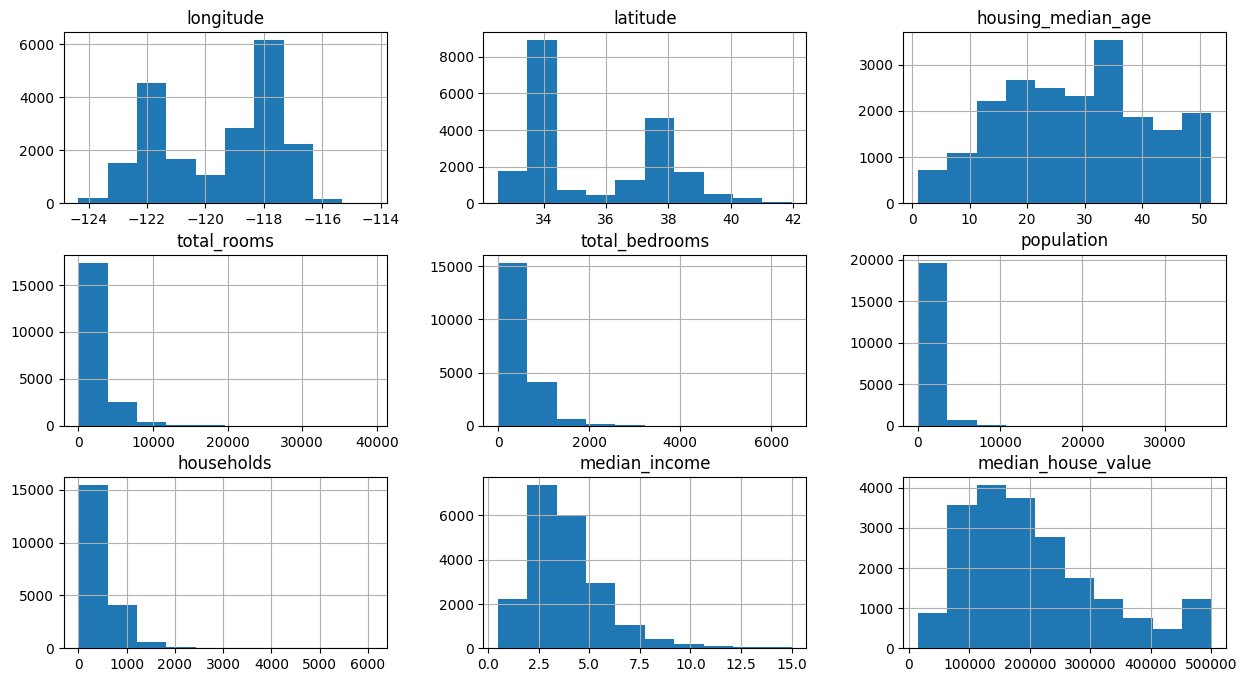

In [564]:
%matplotlib inline
data.hist(figsize=(15,8))

In [565]:
ocean_proximity = data['ocean_proximity']

In [566]:
data.drop(['ocean_proximity'],axis=1,inplace=True)

In [567]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


Korelasyon ilişkilerini incelemek adına HeatMap'in oluşturulması

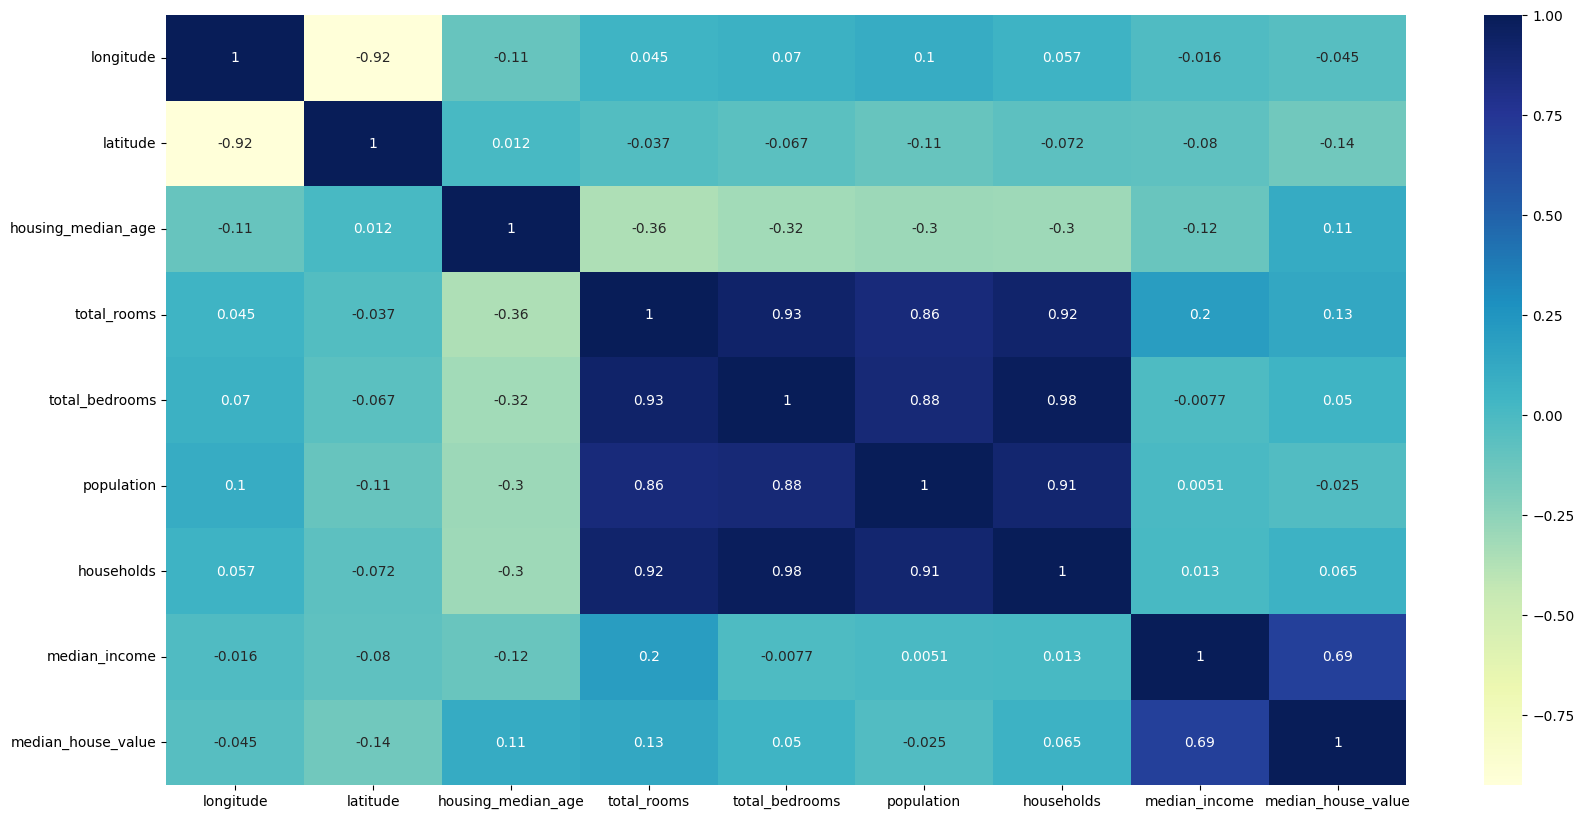

In [568]:
crateheatmap(data,20,10)

# Transform (Dağılım Analizi ve Dönüşüm Karşılaştırması)
Linear Regression gibi parametrik yöntemler, olasılıksal yorumlanmalarında hata terimlerinin ve dolaylı olarak değişkenlerin Gaussian (normal) dağılıma yakın olmasını varsayar. Bu nedenle, modelleme aşamasına geçmeden önce feature'ların dağılımları incelenmiş; LOG, SQRT ve Yeo-Johnson dönüşümleri karşılaştırılarak normal dağılıma en çok yaklaşan dönüşümün hangisi olduğu analiz edilmiştir. 


**LOG** 

In [138]:
data['total_rooms_log'] = np.log(data['total_rooms'] + 1)
data['total_bedrooms_log'] = np.log(data['total_bedrooms'] + 1)
data['population_log'] = np.log(data['population'] + 1)
data['households_log'] = np.log(data['households'] + 1)

**SQRT**

In [160]:
data['total_rooms_sqrt'] = np.sqrt(data['total_rooms'])
data['total_bedrooms_sqrt'] = np.sqrt(data['total_bedrooms'])
data['population_sqrt'] = np.sqrt(data['population'])
data['households_sqrt'] = np.sqrt(data['households'])

C:\Users\m2\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\m2\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\m2\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\m2\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


**YEO**

In [569]:
pt_rooms = PowerTransformer(method='yeo-johnson')
data['total_rooms'] = pt_rooms.fit_transform(data[['total_rooms']])

pt_bedrooms = PowerTransformer(method='yeo-johnson')
data['total_bedrooms'] = pt_bedrooms.fit_transform(data[['total_bedrooms']])

pt_pop = PowerTransformer(method='yeo-johnson')
data['population'] = pt_pop.fit_transform(data[['population']])

pt_house = PowerTransformer(method='yeo-johnson')
data['households'] = pt_house.fit_transform(data[['households']])


In [570]:
data.skew()

longitude            -0.296141
latitude              0.464934
housing_median_age    0.061605
total_rooms           0.122631
total_bedrooms        0.105825
population            0.111575
households            0.110393
median_income         1.644557
median_house_value    0.978290
dtype: float64

# Feature Engineering
Bu aşamada, mevcut değişkenlerden problem alanına (domain) daha anlamlıve açıklayıcı olabilecek yeni özellikler türetilmiştir. Amaç, mutlak sayılar yerine oranlar ve yoğunluklar üzerinden konut fiyatını etkileyebilecek ilişkileri daha iyi yakalayabilmektir.

In [571]:
data['bedrooms_per_room'] = data['total_bedrooms'] /  data['total_rooms']
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['population_per_household'] = data['population'] / data['households']
data['persons_per_room'] = data['population_per_household'] / data['total_rooms']
data['longxlan'] = data['longitude'] /  data['latitude']

In [572]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_room,rooms_per_household,population_per_household,persons_per_room,longxlan
0,-122.23,37.88,41.0,-1.158322,-1.572948,-1.619591,-1.520935,8.3252,452600.0,1.357953,0.761586,1.064866,-0.919317,-3.226769
1,-122.22,37.86,21.0,1.895651,1.436871,1.091069,1.634628,8.3014,358500.0,0.757983,1.159683,0.667472,0.352107,-3.228209
2,-122.24,37.85,52.0,-0.534826,-1.130536,-1.139469,-1.136307,7.2574,352100.0,2.113837,0.470671,1.002783,-1.874969,-3.229590
3,-122.25,37.85,52.0,-0.713982,-0.870963,-0.999879,-0.878602,5.6431,341300.0,1.219867,0.812634,1.138035,-1.593927,-3.229855
4,-122.25,37.85,52.0,-0.399769,-0.647624,-0.984877,-0.665971,3.8462,342200.0,1.619997,0.600279,1.478858,-3.699285,-3.229855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,-0.369226,-0.259156,-0.476124,-0.343257,1.5603,78100.0,0.701889,1.075655,1.387080,-3.756726,-3.067123
20636,-121.21,39.49,18.0,-1.420273,-1.405156,-1.512356,-1.628234,2.5568,77100.0,0.989357,0.872278,0.928832,-0.653981,-3.069385
20637,-121.22,39.43,17.0,0.046154,0.111375,-0.238955,0.041772,1.7000,92300.0,2.413096,1.104921,-5.720516,-123.943090,-3.074309
20638,-121.32,39.43,18.0,-0.220535,-0.133998,-0.647438,-0.265963,1.8672,84700.0,0.607604,0.829195,2.434318,-11.038253,-3.076845


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'bedrooms_per_room'}>,
        <Axes: title={'center': 'rooms_per_household'}>,
        <Axes: title={'center': 'population_per_household'}>],
       [<Axes: title={'center': 'persons_per_room'}>,
        <Axes: title={'center': 'longxlan'}>, <Axes: >, <Axes: >]],
      dtype=object)

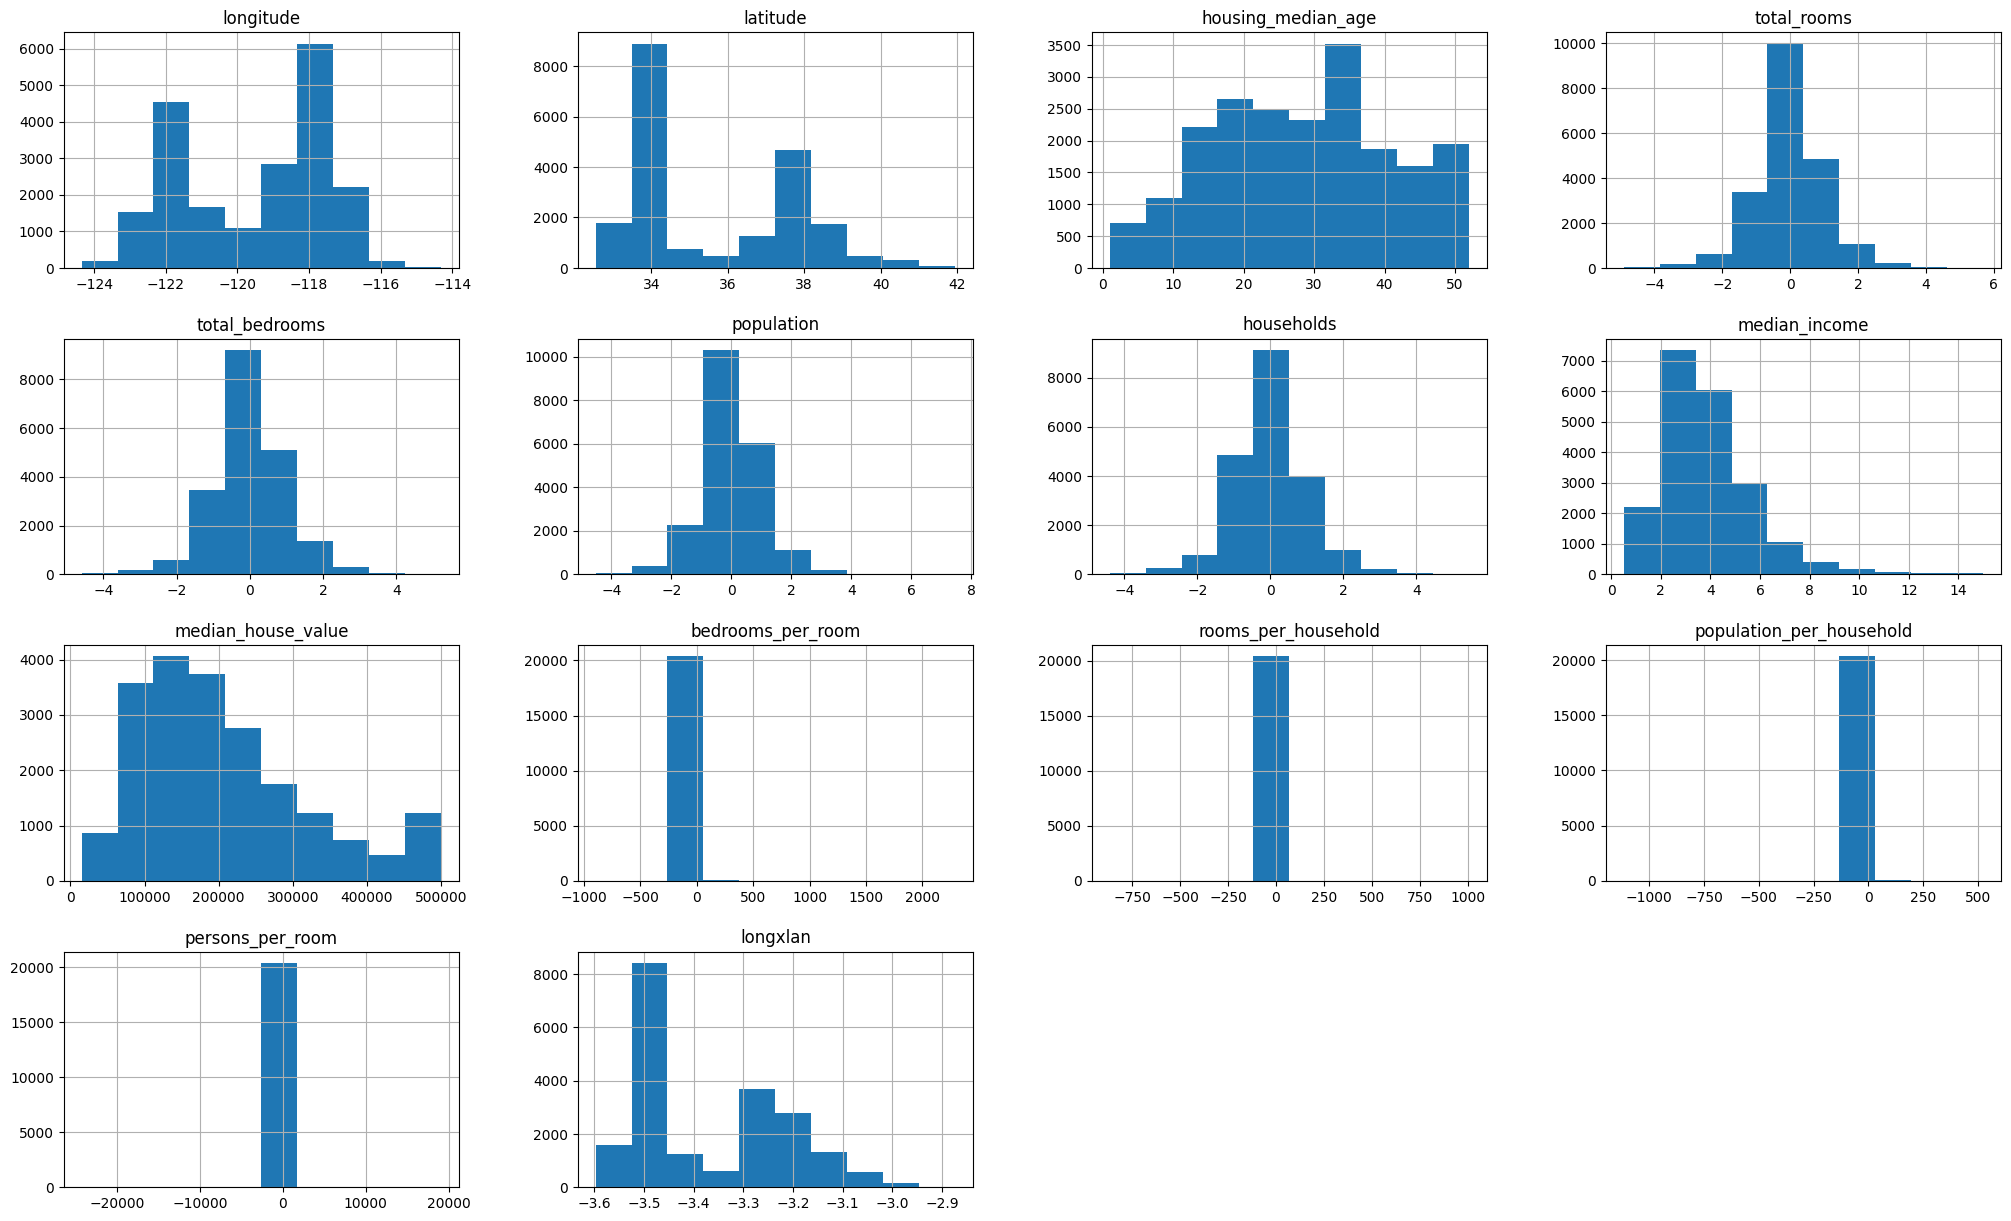

In [573]:
data.hist(figsize=(25,15))

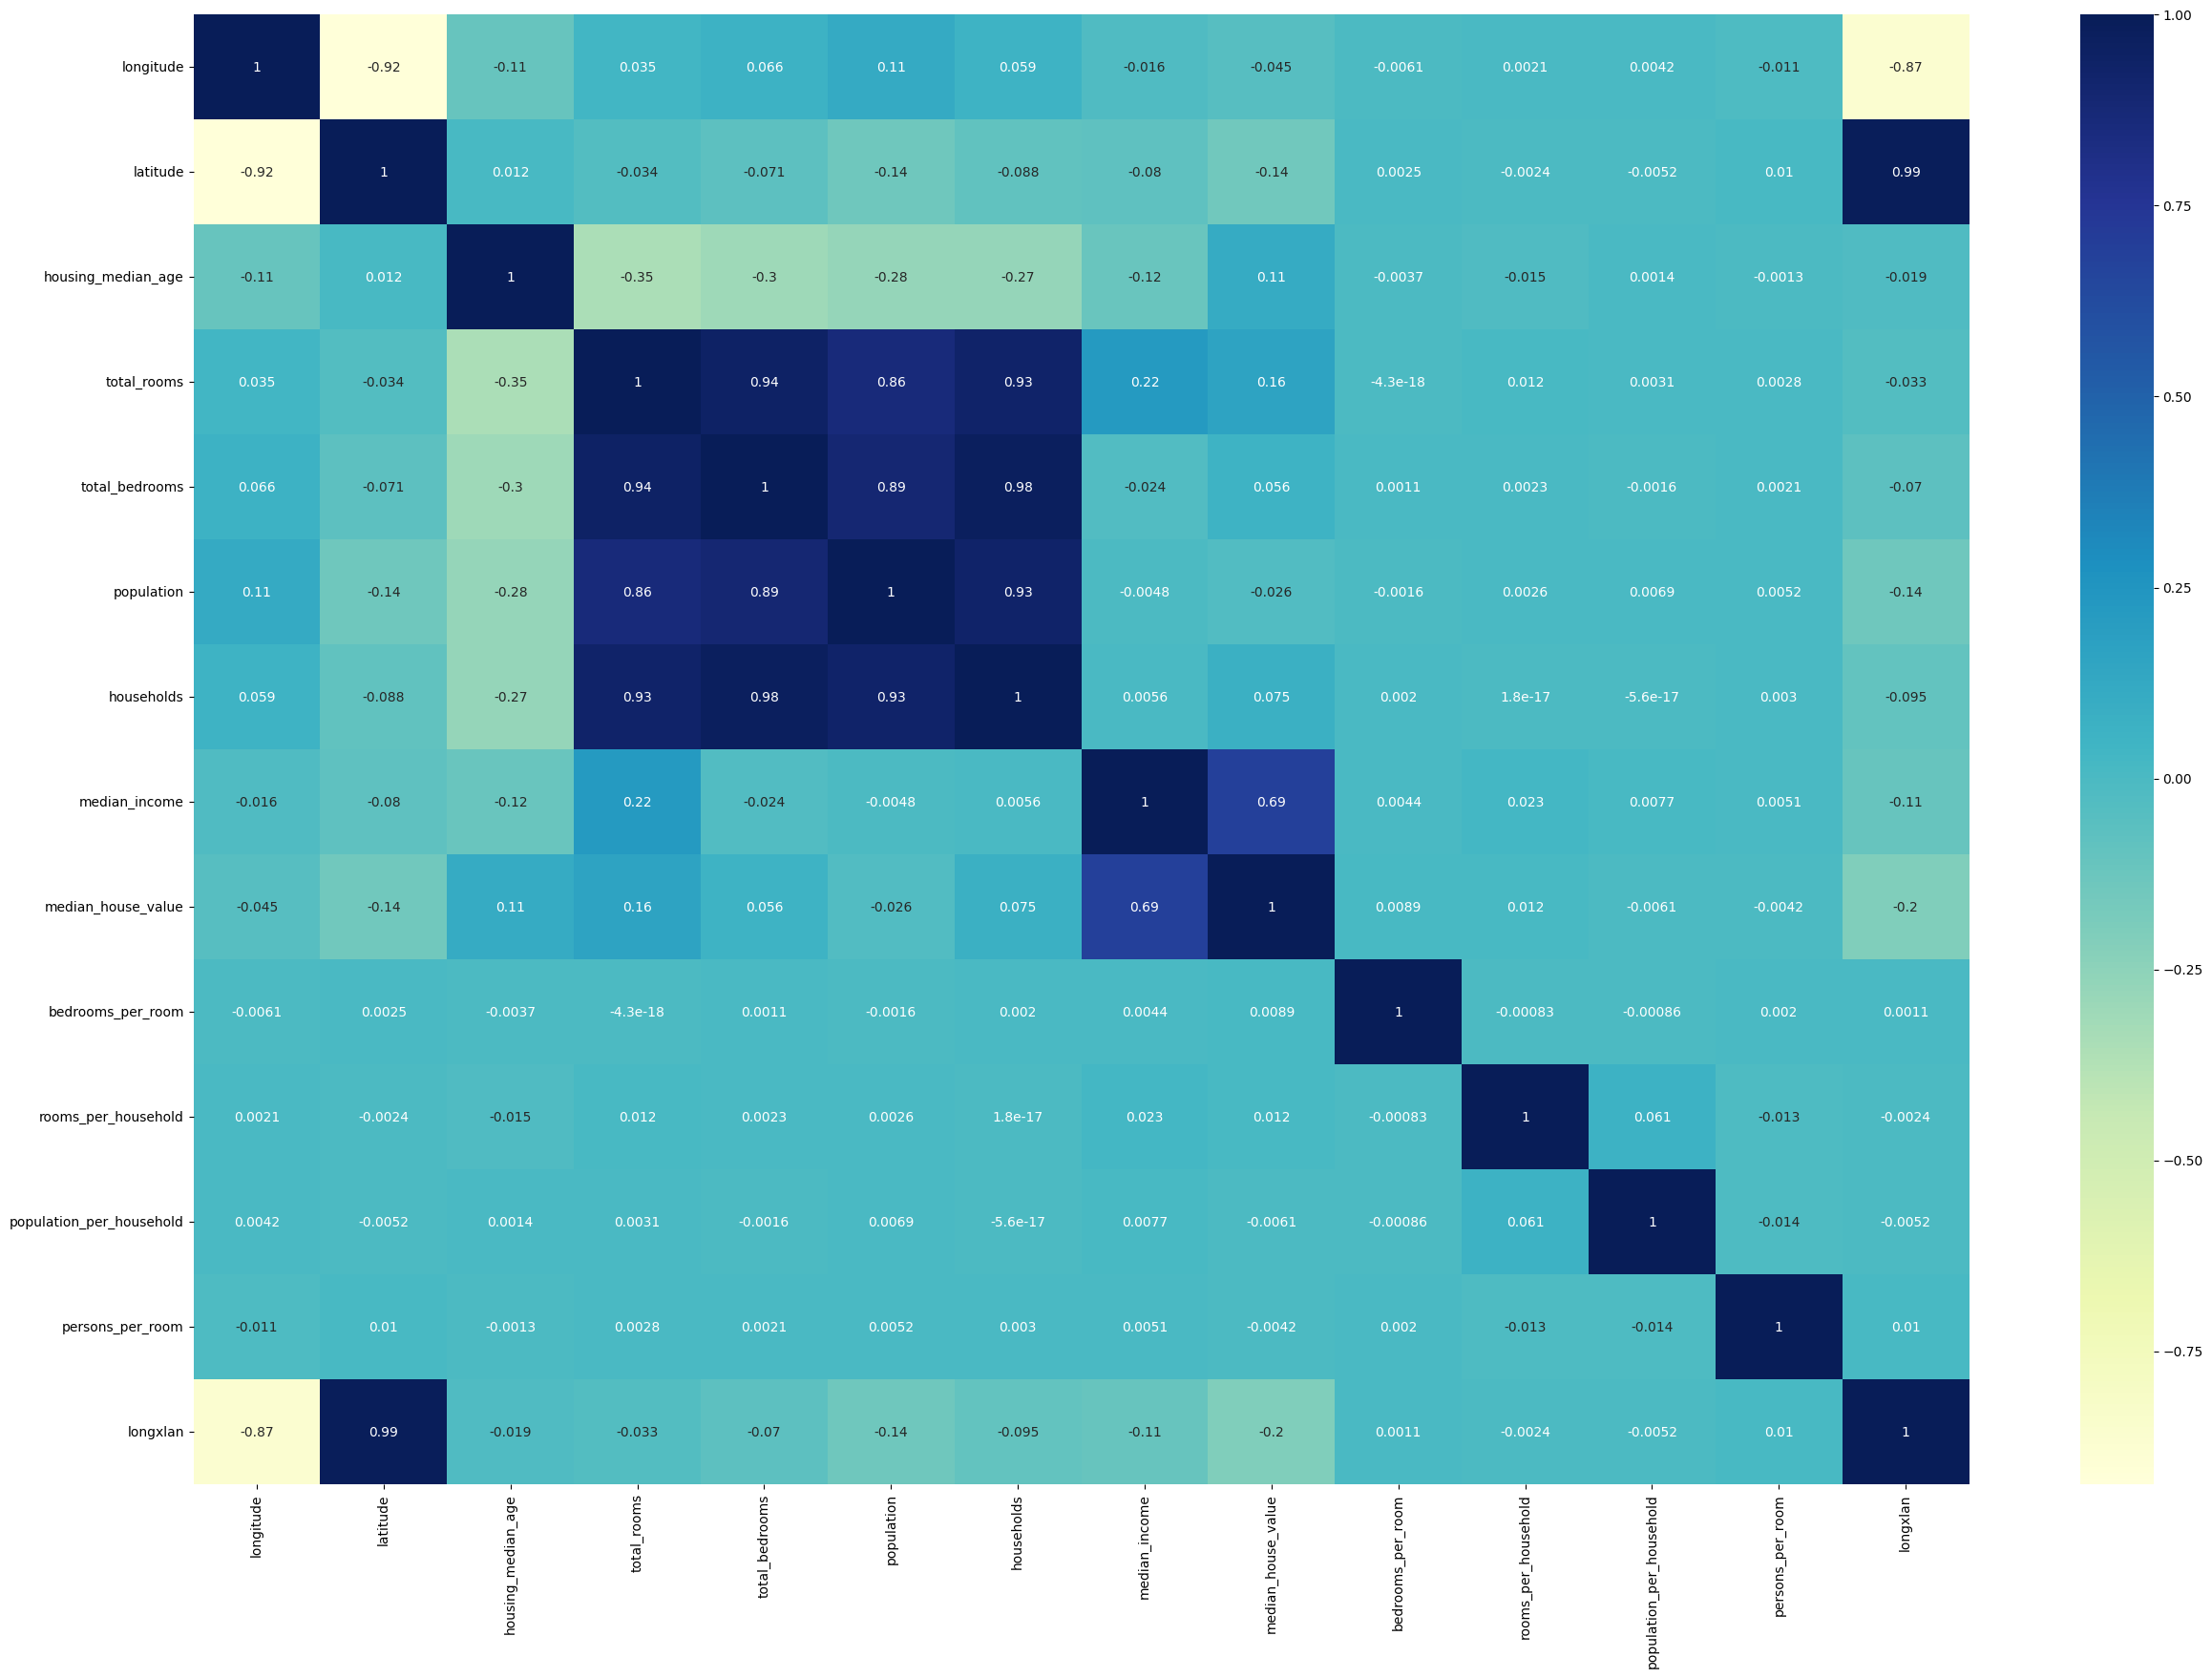

In [574]:
crateheatmap(data,30,20)

In [575]:
data.insert(8, "ocean_proximity", ocean_proximity)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,bedrooms_per_room,rooms_per_household,population_per_household,persons_per_room,longxlan
0,-122.23,37.88,41.0,-1.158322,-1.572948,-1.619591,-1.520935,8.3252,NEAR BAY,452600.0,1.357953,0.761586,1.064866,-0.919317,-3.226769
1,-122.22,37.86,21.0,1.895651,1.436871,1.091069,1.634628,8.3014,NEAR BAY,358500.0,0.757983,1.159683,0.667472,0.352107,-3.228209
2,-122.24,37.85,52.0,-0.534826,-1.130536,-1.139469,-1.136307,7.2574,NEAR BAY,352100.0,2.113837,0.470671,1.002783,-1.874969,-3.229590
3,-122.25,37.85,52.0,-0.713982,-0.870963,-0.999879,-0.878602,5.6431,NEAR BAY,341300.0,1.219867,0.812634,1.138035,-1.593927,-3.229855
4,-122.25,37.85,52.0,-0.399769,-0.647624,-0.984877,-0.665971,3.8462,NEAR BAY,342200.0,1.619997,0.600279,1.478858,-3.699285,-3.229855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,-0.369226,-0.259156,-0.476124,-0.343257,1.5603,INLAND,78100.0,0.701889,1.075655,1.387080,-3.756726,-3.067123
20636,-121.21,39.49,18.0,-1.420273,-1.405156,-1.512356,-1.628234,2.5568,INLAND,77100.0,0.989357,0.872278,0.928832,-0.653981,-3.069385
20637,-121.22,39.43,17.0,0.046154,0.111375,-0.238955,0.041772,1.7000,INLAND,92300.0,2.413096,1.104921,-5.720516,-123.943090,-3.074309
20638,-121.32,39.43,18.0,-0.220535,-0.133998,-0.647438,-0.265963,1.8672,INLAND,84700.0,0.607604,0.829195,2.434318,-11.038253,-3.076845


# One Hot Encoding

In [576]:
data = data.join(pd.get_dummies(data.ocean_proximity,dtype=int)).drop(['ocean_proximity'],axis=1)

In [577]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_room,rooms_per_household,population_per_household,persons_per_room,longxlan,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,-1.158322,-1.572948,-1.619591,-1.520935,8.3252,452600.0,1.357953,0.761586,1.064866,-0.919317,-3.226769,0,0,0,1,0
1,-122.22,37.86,21.0,1.895651,1.436871,1.091069,1.634628,8.3014,358500.0,0.757983,1.159683,0.667472,0.352107,-3.228209,0,0,0,1,0
2,-122.24,37.85,52.0,-0.534826,-1.130536,-1.139469,-1.136307,7.2574,352100.0,2.113837,0.470671,1.002783,-1.874969,-3.229590,0,0,0,1,0
3,-122.25,37.85,52.0,-0.713982,-0.870963,-0.999879,-0.878602,5.6431,341300.0,1.219867,0.812634,1.138035,-1.593927,-3.229855,0,0,0,1,0
4,-122.25,37.85,52.0,-0.399769,-0.647624,-0.984877,-0.665971,3.8462,342200.0,1.619997,0.600279,1.478858,-3.699285,-3.229855,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,-0.369226,-0.259156,-0.476124,-0.343257,1.5603,78100.0,0.701889,1.075655,1.387080,-3.756726,-3.067123,0,1,0,0,0
20636,-121.21,39.49,18.0,-1.420273,-1.405156,-1.512356,-1.628234,2.5568,77100.0,0.989357,0.872278,0.928832,-0.653981,-3.069385,0,1,0,0,0
20637,-121.22,39.43,17.0,0.046154,0.111375,-0.238955,0.041772,1.7000,92300.0,2.413096,1.104921,-5.720516,-123.943090,-3.074309,0,1,0,0,0
20638,-121.32,39.43,18.0,-0.220535,-0.133998,-0.647438,-0.265963,1.8672,84700.0,0.607604,0.829195,2.434318,-11.038253,-3.076845,0,1,0,0,0


In [578]:
Y = data['median_house_value']
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [579]:
# Target değişkeninin (median_house_value) sona alınması:

data = data.drop(columns=['median_house_value']) \
           .assign(median_house_value=Y)

data.drop(['median_house_value'],axis=1,inplace = True)
data = data.join(Y)
data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_room,rooms_per_household,population_per_household,persons_per_room,longxlan,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,-1.158322,-1.572948,-1.619591,-1.520935,8.3252,1.357953,0.761586,1.064866,-0.919317,-3.226769,0,0,0,1,0,452600.0
1,-122.22,37.86,21.0,1.895651,1.436871,1.091069,1.634628,8.3014,0.757983,1.159683,0.667472,0.352107,-3.228209,0,0,0,1,0,358500.0
2,-122.24,37.85,52.0,-0.534826,-1.130536,-1.139469,-1.136307,7.2574,2.113837,0.470671,1.002783,-1.874969,-3.229590,0,0,0,1,0,352100.0
3,-122.25,37.85,52.0,-0.713982,-0.870963,-0.999879,-0.878602,5.6431,1.219867,0.812634,1.138035,-1.593927,-3.229855,0,0,0,1,0,341300.0
4,-122.25,37.85,52.0,-0.399769,-0.647624,-0.984877,-0.665971,3.8462,1.619997,0.600279,1.478858,-3.699285,-3.229855,0,0,0,1,0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,-0.369226,-0.259156,-0.476124,-0.343257,1.5603,0.701889,1.075655,1.387080,-3.756726,-3.067123,0,1,0,0,0,78100.0
20636,-121.21,39.49,18.0,-1.420273,-1.405156,-1.512356,-1.628234,2.5568,0.989357,0.872278,0.928832,-0.653981,-3.069385,0,1,0,0,0,77100.0
20637,-121.22,39.43,17.0,0.046154,0.111375,-0.238955,0.041772,1.7000,2.413096,1.104921,-5.720516,-123.943090,-3.074309,0,1,0,0,0,92300.0
20638,-121.32,39.43,18.0,-0.220535,-0.133998,-0.647438,-0.265963,1.8672,0.607604,0.829195,2.434318,-11.038253,-3.076845,0,1,0,0,0,84700.0


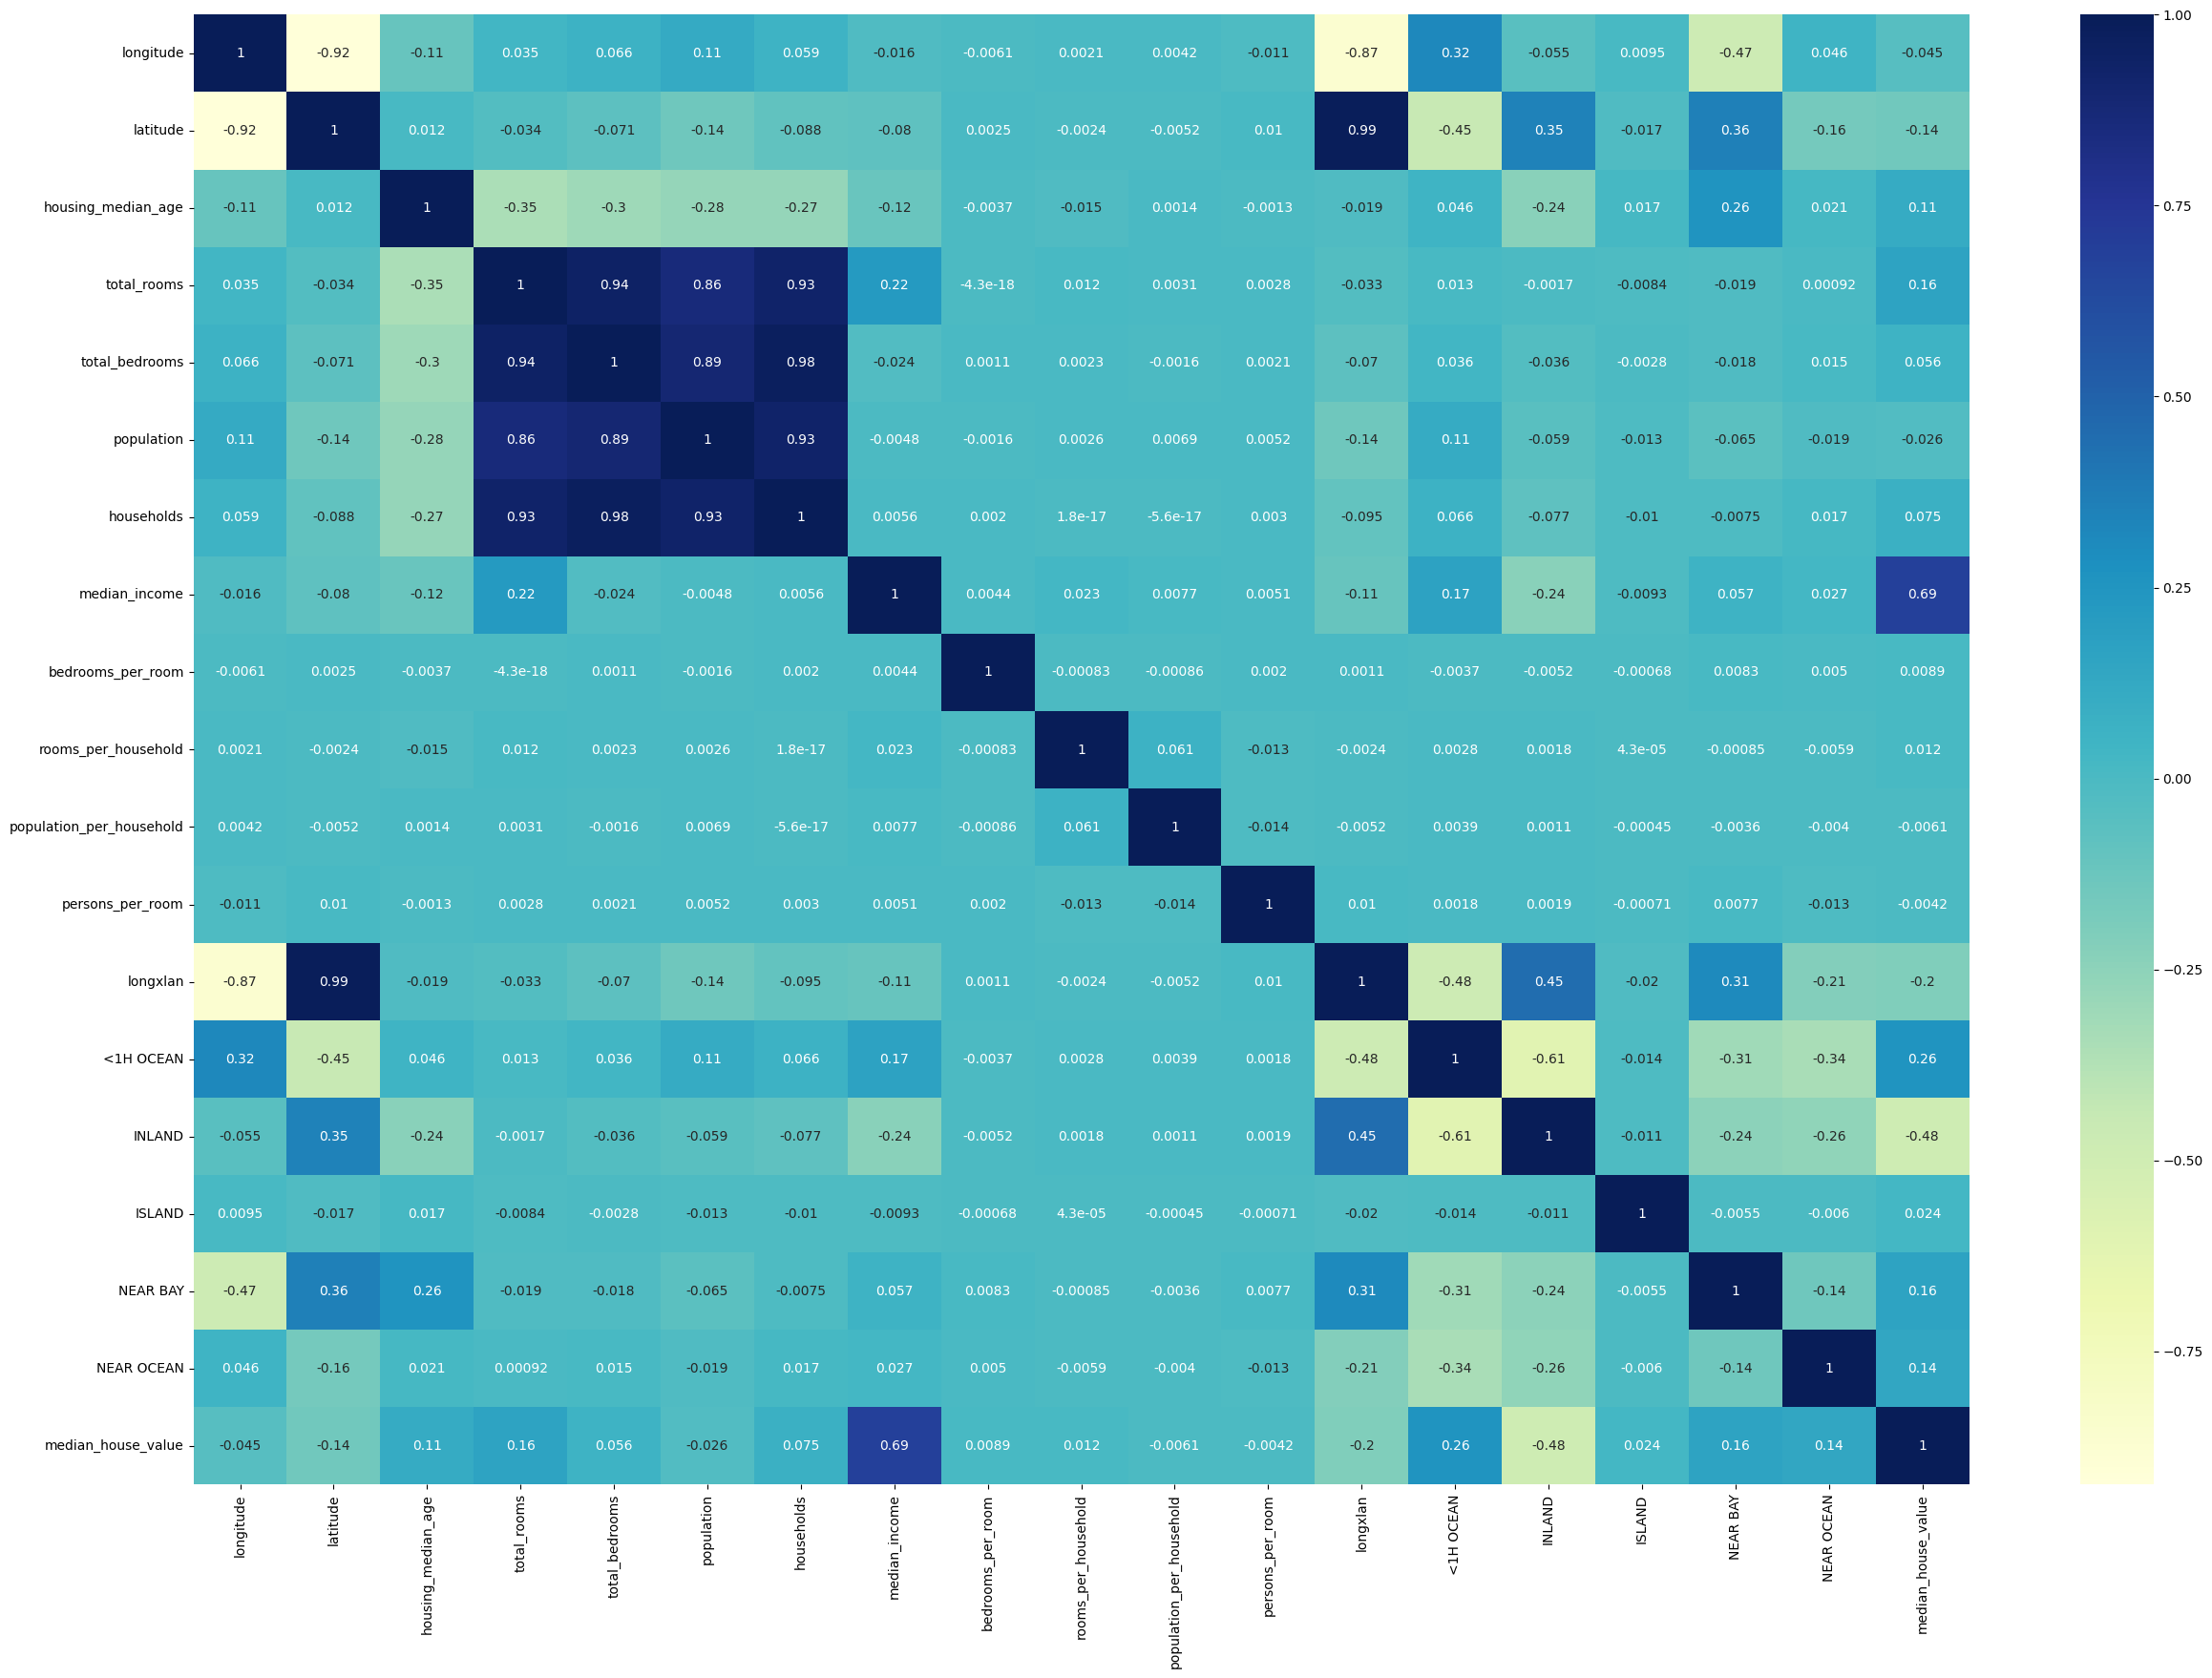

In [580]:
crateheatmap(data,30,20)

In [581]:
X=data.drop(['median_house_value'],axis=1)


In [582]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_room,rooms_per_household,population_per_household,persons_per_room,longxlan,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,-1.158322,-1.572948,-1.619591,-1.520935,8.3252,1.357953,0.761586,1.064866,-0.919317,-3.226769,0,0,0,1,0
1,-122.22,37.86,21.0,1.895651,1.436871,1.091069,1.634628,8.3014,0.757983,1.159683,0.667472,0.352107,-3.228209,0,0,0,1,0
2,-122.24,37.85,52.0,-0.534826,-1.130536,-1.139469,-1.136307,7.2574,2.113837,0.470671,1.002783,-1.874969,-3.229590,0,0,0,1,0
3,-122.25,37.85,52.0,-0.713982,-0.870963,-0.999879,-0.878602,5.6431,1.219867,0.812634,1.138035,-1.593927,-3.229855,0,0,0,1,0
4,-122.25,37.85,52.0,-0.399769,-0.647624,-0.984877,-0.665971,3.8462,1.619997,0.600279,1.478858,-3.699285,-3.229855,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,-0.369226,-0.259156,-0.476124,-0.343257,1.5603,0.701889,1.075655,1.387080,-3.756726,-3.067123,0,1,0,0,0
20636,-121.21,39.49,18.0,-1.420273,-1.405156,-1.512356,-1.628234,2.5568,0.989357,0.872278,0.928832,-0.653981,-3.069385,0,1,0,0,0
20637,-121.22,39.43,17.0,0.046154,0.111375,-0.238955,0.041772,1.7000,2.413096,1.104921,-5.720516,-123.943090,-3.074309,0,1,0,0,0
20638,-121.32,39.43,18.0,-0.220535,-0.133998,-0.647438,-0.265963,1.8672,0.607604,0.829195,2.434318,-11.038253,-3.076845,0,1,0,0,0


# Veri setinin Test ve Train olarak ayrılması:
random_state=42 ile deneyin tekrarlanabilirliği sağlanmıştır.


In [583]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Backward Selection 

In [584]:
def backward_pvalue_selection(X, y, alpha=0.05, verbose=True):
    X = sm.add_constant(X)
    selected = list(X.columns)

    while True:
        model = sm.OLS(y, X[selected]).fit()
        pvalues = model.pvalues.drop("const")

        max_p = pvalues.max()
        worst_feature = pvalues.idxmax()

        if max_p > alpha:
            selected.remove(worst_feature)
            if verbose:
                print(f"Çıkarıldı: {worst_feature} | p-value: {max_p:.4f}")
        else:
            break

    final_model = sm.OLS(y, X[selected]).fit()
    return selected, final_model


In [585]:
selected_p, model_p = backward_pvalue_selection(X_train, Y_train, alpha=0.05)
print(selected_p)
print(model_p.summary())


Çıkarıldı: bedrooms_per_room | p-value: 0.9180
Çıkarıldı: rooms_per_household | p-value: 0.9172
Çıkarıldı: ISLAND | p-value: 0.3722
Çıkarıldı: persons_per_room | p-value: 0.3596
Çıkarıldı: population_per_household | p-value: 0.2196
['const', 'longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'longxlan', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN']
                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     2569.
Date:                Wed, 17 Dec 2025   Prob (F-statistic):               0.00
Time:                        01:40:16   Log-Likelihood:            -2.0458e+05
No. Observations:               16346   AIC:                         4.092e+05
Df Residuals:      

In [586]:
X_test.drop(['bedrooms_per_room'],axis=1,inplace=True)
X_test.drop(['rooms_per_household'],axis=1,inplace=True)
X_test.drop(['ISLAND'],axis=1,inplace=True)
X_test.drop(['persons_per_room'],axis=1,inplace=True) 
X_test.drop(['population_per_household'],axis=1,inplace=True)


In [587]:
X_train.drop(['bedrooms_per_room'],axis=1,inplace=True)
X_train.drop(['rooms_per_household'],axis=1,inplace=True)
X_train.drop(['ISLAND'],axis=1,inplace=True)
X_train.drop(['persons_per_room'],axis=1,inplace=True) 
X_train.drop(['population_per_household'],axis=1,inplace=True)


In [588]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [589]:
reg.score(X_test,Y_test)

0.6711495925973143

In [590]:
# Tahminler
y_pred_lr = reg.predict(X_test)

# Performans metrikleri
mse = mean_squared_error(Y_test, y_pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred_lr)
r2 = r2_score(Y_test, y_pred_lr)

print("Linear Regression Performans Sonuçları")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAE  : {mae:.2f}")
print(f"R²   : {r2:.4f}")

Linear Regression Performans Sonuçları
MSE  : 4497088772.80
RMSE : 67060.34
MAE  : 48668.90
R²   : 0.6711


In [592]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [594]:
from sklearn.linear_model import LinearRegression
reg_s = LinearRegression()
reg_s.fit(X_train_scaled,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [596]:
# Tahminler
ys_pred_lr = reg_s.predict(X_test_scaled)

# Performans metrikleri
mse = mean_squared_error(Y_test, ys_pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, ys_pred_lr)
r2 = r2_score(Y_test, ys_pred_lr)

print("Linear Regression Performans Sonuçları")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAE  : {mae:.2f}")
print(f"R²   : {r2:.4f}")

Linear Regression Performans Sonuçları
MSE  : 4497088772.80
RMSE : 67060.34
MAE  : 48668.90
R²   : 0.6711


In [510]:
Y_train

17727    227600.0
2057     110400.0
6453     248100.0
4619     305600.0
15266    214600.0
           ...   
11397    273400.0
12081    160800.0
5447     335400.0
866      231200.0
15948    251800.0
Name: median_house_value, Length: 16346, dtype: float64

In [538]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=585,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, Y_train)


,n_estimators,585
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [539]:
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
})

feature_importance_df = feature_importance_df.sort_values(
    by="Importance",
    ascending=False
).reset_index(drop=True)

feature_importance_df


,Feature,Importance
0,median_income,0.474723
1,INLAND,0.137761
2,population_per_household,0.118665
3,longitude,0.055113
4,longxlan,0.049049
5,housing_median_age,0.041561
6,latitude,0.026707
7,rooms_per_household,0.025010
8,bedrooms_per_room,0.021203
9,persons_per_room,0.010650


In [ ]:
result = rf.score(X_test, Y_test)
result

In [540]:
X_test.drop(['population_per_household'],axis=1,inplace=True)
X_train.drop(['population_per_household'],axis=1,inplace=True)

X_test.drop(['median_income'],axis=1,inplace=True)
X_train.drop(['median_income'],axis=1,inplace=True)

X_test.drop(['ISLAND'],axis=1,inplace=True)
X_train.drop(['ISLAND'],axis=1,inplace=True)

X_test.drop(['NEAR BAY'],axis=1,inplace=True)
X_train.drop(['NEAR BAY'],axis=1,inplace=True)

X_test.drop(['<1H OCEAN'],axis=1,inplace=True)
X_train.drop(['<1H OCEAN'],axis=1,inplace=True)

X_test.drop(['population'],axis=1,inplace=True)
X_train.drop(['population'],axis=1,inplace=True)

X_test.drop(['total_rooms'],axis=1,inplace=True)
X_train.drop(['total_rooms'],axis=1,inplace=True)

X_test.drop(['households'],axis=1,inplace=True)
X_train.drop(['households'],axis=1,inplace=True)


In [541]:
X_test

,longitude,latitude,housing_median_age,total_bedrooms,bedrooms_per_room,rooms_per_household,persons_per_room,longxlan,INLAND,NEAR OCEAN
14416,-117.24,32.79,20.0,278.0,0.289282,3.783465,0.002151,-3.575480,0,1
16383,-121.29,38.01,2.0,1116.0,0.174293,6.690700,0.000543,-3.191002,1,0
7731,-118.14,33.92,31.0,853.0,0.228625,4.657928,0.000774,-3.482901,0,0
1410,-122.07,37.94,30.0,276.0,0.219048,5.701357,0.002539,-3.217449,0,0
1335,-121.89,37.99,4.0,597.0,0.274988,4.709328,0.000927,-3.208476,1,0
...,...,...,...,...,...,...,...,...,...,...
8291,-118.15,33.76,36.0,785.0,0.269204,3.893191,0.000542,-3.499704,0,1
6274,-117.95,34.03,33.0,394.0,0.221100,4.739362,0.002264,-3.466059,0,0
2997,-119.03,35.32,12.0,549.0,0.201764,5.202677,0.000909,-3.370045,1,0
13440,-117.42,34.08,28.0,419.0,0.182174,5.180180,0.001285,-3.445423,1,0


# Seçilen Featurelar ile Parametre ayarı:
RF için ilk olarak daha genel hatlarıyla bir arama yapıldıktan sonrasında n_estimators sayısının en idael sonucu için bir arama daha yapılmıştır.

In [369]:
param_grid = {
    "n_estimators": [300,350,400,450,500],
    "max_depth": [20,30,40,50],
    "min_samples_split": [2,3,4,5],
    "min_samples_leaf": [1,2,3,5],
}


In [416]:
param_grid = {
    "n_estimators": [500,505,510,515,520,525,530,535,540,545,550,555,560,565,570,575,580,585,590,595,600],
    "max_depth": [30],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
}


In [417]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)
    
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="r2",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, Y_train)


Fitting 5 folds for each of 21 candidates, totalling 105 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [30], 'min_samples_leaf': [1], 'min_samples_split': [2], 'n_estimators': [500, 505, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,585


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)
    
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="r2",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, Y_train)


Fitting 5 folds for each of 320 candidates, totalling 1600 fits


In [418]:
best_rf = grid_search.best_estimator_

print("Best Parameters:")
print(grid_search.best_params_)

print("Best CV R²:")
print(grid_search.best_score_)


Best Parameters:
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 585}
Best CV R²:
0.8192958653238914


In [419]:
y_pred = best_rf.predict(X_test)
test_r2 = r2_score(Y_test, y_pred)

print("Test R²:", test_r2)


Test R²: 0.835751046159523


# Seçilen Feature ve RF parametreleriyle model eğitimi

In [464]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=585,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, Y_train)


,n_estimators,585
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# RF Model Sonuçları 

In [470]:
result = rf.score(X_test, Y_test)
result

0.8354487320712901

In [469]:
# MSE
mse = mean_squared_error(Y_test, y_pred)

# RMSE
rmse = np.sqrt(mse)

# MAE
mae = mean_absolute_error(Y_test, y_pred)

# R²
r2 = r2_score(Y_test, y_pred)

print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R²:   {r2:.4f}")


MSE:  2246134137.69
RMSE: 47393.40
MAE:  30973.86
R²:   0.8358


In [ ]:
| Model                      | Data Preprocessing                              | Feature Engineering | Number of Features | Feature Selection Method           | R² Score             |
| -------------------------- | ------------------------------------------------| ------------------- | -----------------: | ---------------------------------- | --------------------:|
| Linear Regression          | dropna                                          | None                |                 13 | None                               |   0.6488             |
| Linear Regression          | Yeo–Johnson (Power Transformation)+dropna       | None                |                 13 | None                               |   0.6706940645092676 |
| Linear Regression          | Yeo–Johnson (Power Transformation)+dropna       | None                |                 13 | p-value-based Backward Elimination |   0.6706940645092676 |
| Linear Regression          | Yeo–Johnson (Power Transformation)+dropna       | Applied             |                 18 | None                               |   0.6713364577648366 |
| Linear Regression          | Yeo–Johnson (Power Transformation)+dropna       | Applied             |                 13 | p-value-based Backward Elimination |   0.6713364577648366 |
| Linear Regression          | Yeo–Johnson (Power Transformation)+dropna+scale | Applied             |                 13 | p-value-based Backward Elimination |   0.6713364577648366 |



In [ ]:
| Model                            | Data Preprocessing                        | Feature Engineering | Number of Features | Feature Selection Method              | Hyperparameter Tuning       |    R² Score         |
| -------------------------------- | ----------------------------------------- | ------------------- | -----------------: | --------------------------------------| ---------------------------:|--------------------:|
| Random Forest Regressor          | dropna                                    | None                |                 13 | None                                  |  None                       |  0.8271319000221812 |
| Random Forest Regressor          | Yeo–Johnson (Power Transformation)+dropna | None                |                 13 | None                                  |  None                       |  0.8271319000221812 |
| Random Forest Regressor          | dropna                                    | Applied             |                 18 | None                                  |  None                       |  0.8186399391604258 |
| Random Forest Regressor          | dropna                                    | Applied             |                 13 | p-value-based Backward Elimination    |  None                       |  0.8320872850900523 |
| Random Forest Regressor          | dropna                                    | Applied             |                 10 | LOFO + RF Feature İmportance          |  GridSearching              |  0.8358             |

